<a href="https://colab.research.google.com/github/varudhinii/employee-attrition-analysis-/blob/main/attrition_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Employee Attrition Analysis – Green Destinations


This project analyzes employee attrition data from **Green Destinations**.  
We will calculate attrition rate and explore how factors like **Age, Years at Company, and Monthly Income** impact attrition.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving greendestinationss.csv to greendestinationss (2).csv


In [ ]:
df = pd.read_csv('greendestinationss.csv')
df.head()
df.columns


Index(['greendestination (1)', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34'],
      dtype='object')

In [ ]:
df = pd.read_csv("greendestinationss.csv", skiprows=1)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


METADATA

In [ ]:
df.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df = pd.read_csv("greendestinationss.csv", skiprows=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
def basic_overview(df):
    print("Shape of dataset:", df.shape)
    print("\nColumn names:\n", df.columns)
    print("\nData types:\n", df.dtypes)
    print("\nMissing values:\n", df.isnull().sum())


CLEANING OF DATA

In [ ]:
def clean_data(df):
    # Remove duplicates
    df = df.drop_duplicates()

    # Strip spaces in column names
    df.columns = df.columns.str.strip()

    # Fill numeric missing values with median
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # Fill categorical missing values with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    return df


ENCODING OF DATA

In [ ]:
def encode_categorical(df):
    mapping = {}

    for col in df.select_dtypes(include=['object']).columns:
        mapping[col] = {label: idx for idx, label in enumerate(df[col].unique())}
        df[col] = df[col].map(mapping[col])

    return df, mapping


CALCULATION OF ATTRITION RATE

In [ ]:
def calculate_attrition_rate(df):
    if "Attrition" not in df.columns:
        print("Column 'Attrition' not found.")
        return None

    # Corrected to get the attrition rate for 'Yes' (encoded as 0)
    attrition_rate = df["Attrition"].value_counts(normalize=True)[0] * 100
    print("Overall Attrition Rate: {:.2f}%".format(attrition_rate))
    return attrition_rate

In [ ]:
def plot_distribution(df, column):
    plt.figure(figsize=(8,5))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

def plot_attrition_by_category(df, column):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=column, hue="Attrition")
    plt.title(f"Attrition by {column}")
    plt.show()

def correlation_heatmap(df):
    plt.figure(figsize=(12,8))
    sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()


OVERVIEW

In [ ]:
basic_overview(df)


Shape of dataset: (1470, 35)

Column names:
 Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education           

CLEANING OF DATA

In [ ]:
df = clean_data(df)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


ENCODING OF DATA

In [ ]:
df, mapping = encode_categorical(df)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,0,1102,0,1,2,0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,1,1,279,1,8,1,0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,0,0,1373,1,2,2,1,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1,1392,1,3,4,0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,1,0,591,1,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2


CALCULATION OF ATTRITION RATE

In [ ]:
calculate_attrition_rate(df)


Overall Attrition Rate: 16.12%


np.float64(16.122448979591837)

PLOT OUTPUTS

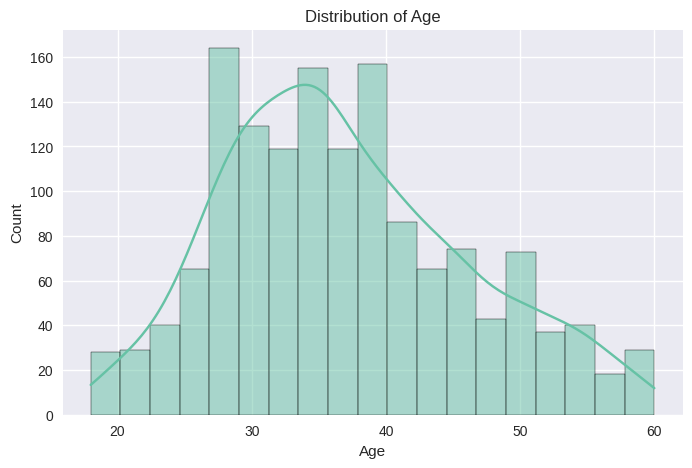

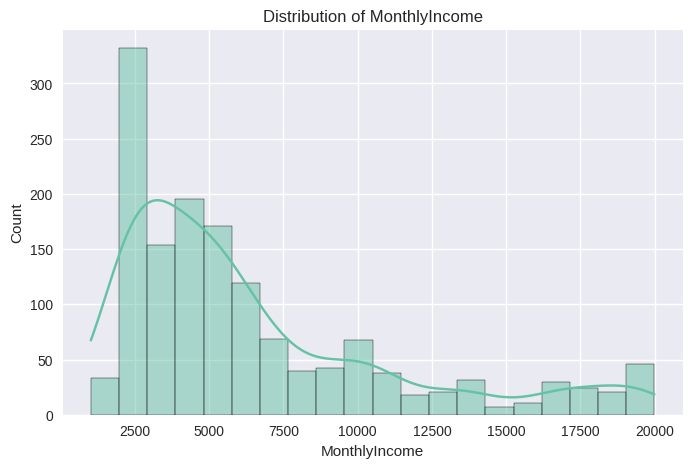

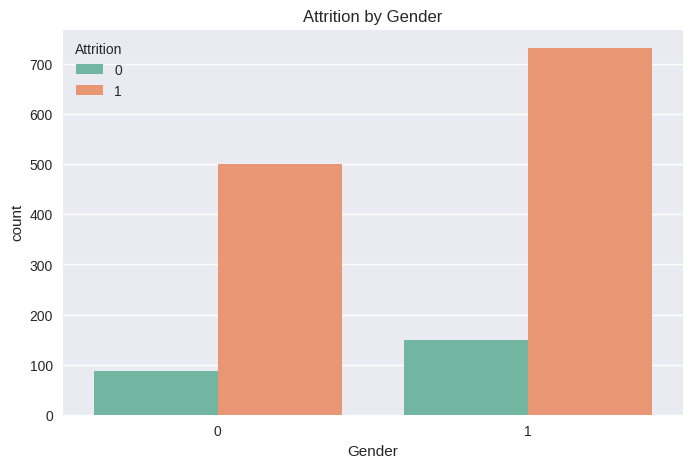

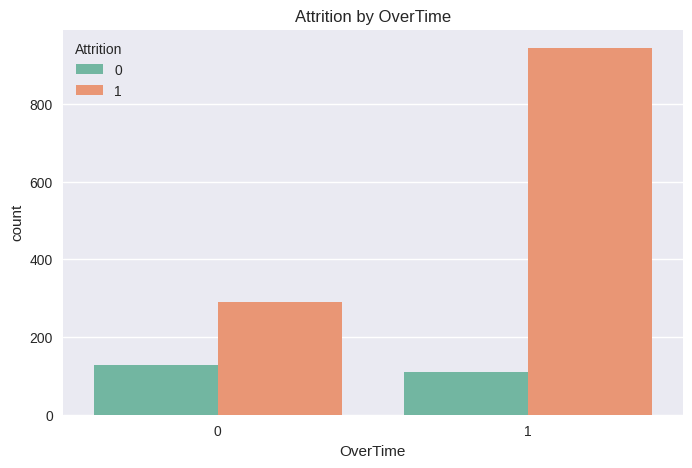

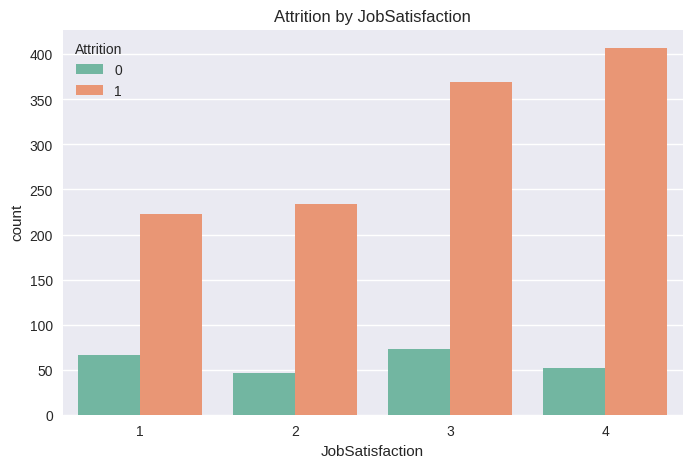

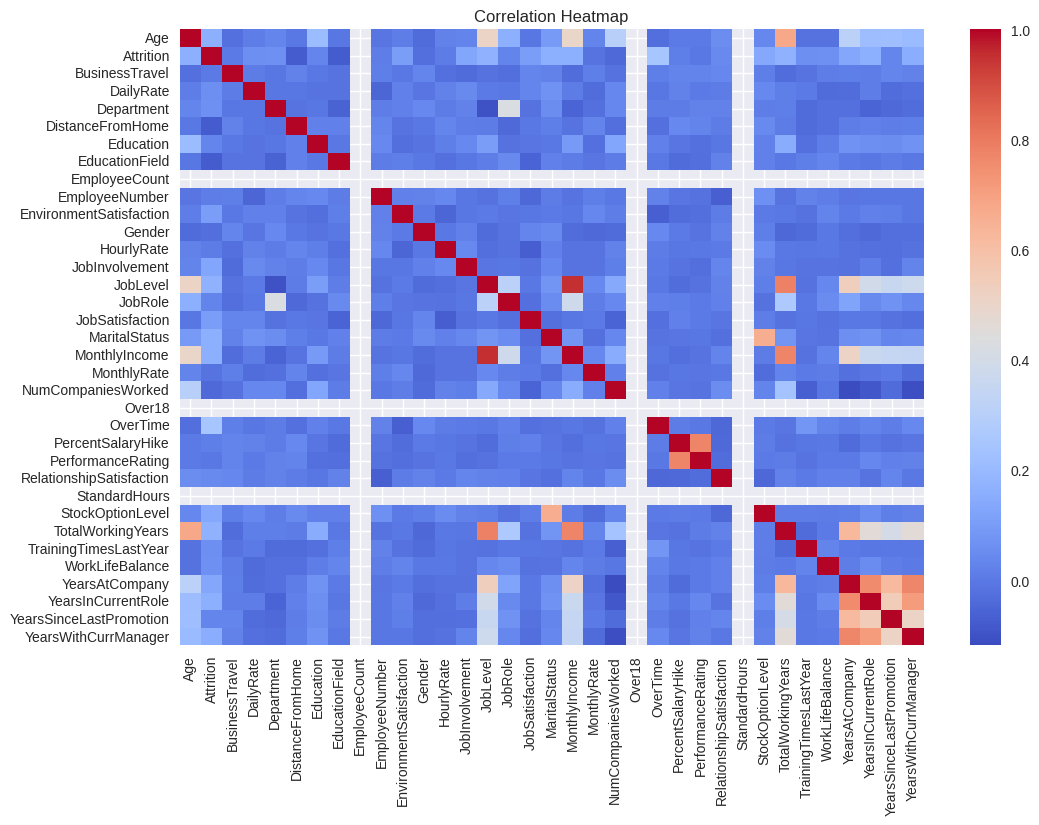

In [ ]:
plot_distribution(df, "Age")
plot_distribution(df, "MonthlyIncome")

plot_attrition_by_category(df, "Gender")
plot_attrition_by_category(df, "OverTime")
plot_attrition_by_category(df, "JobSatisfaction")

correlation_heatmap(df)


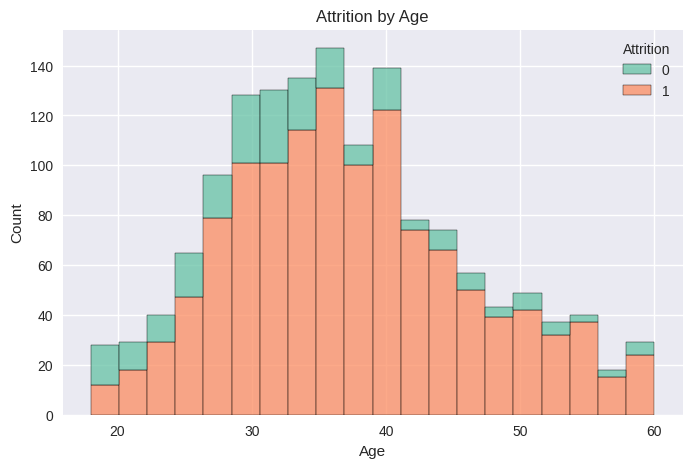

In [ ]:

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', bins=20)
plt.title("Attrition by Age")
plt.show()


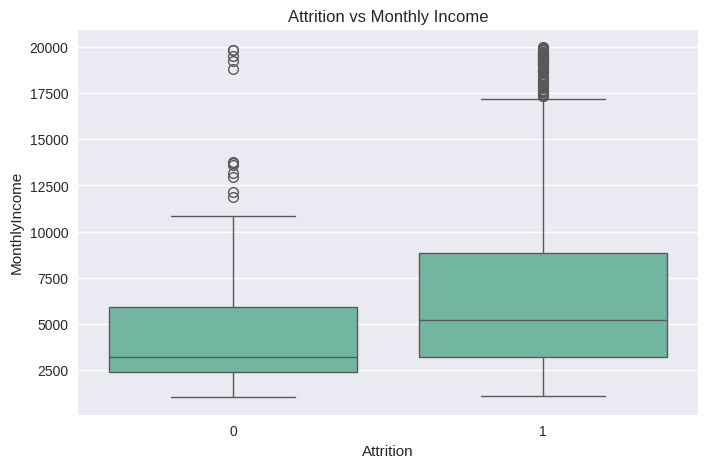

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.show()


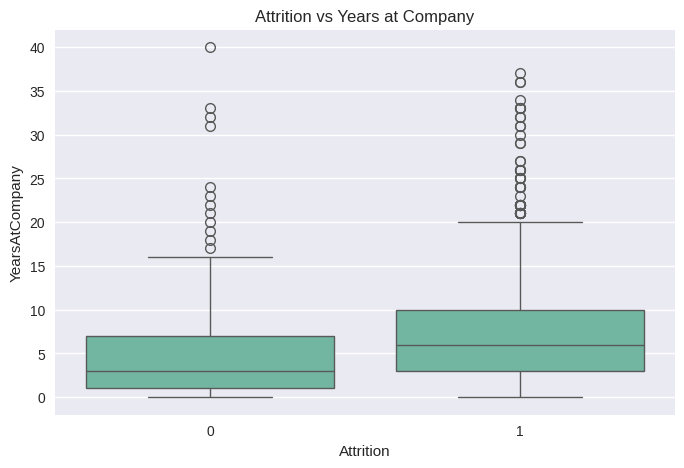

In [ ]:

plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df)
plt.title("Attrition vs Years at Company")
plt.show()


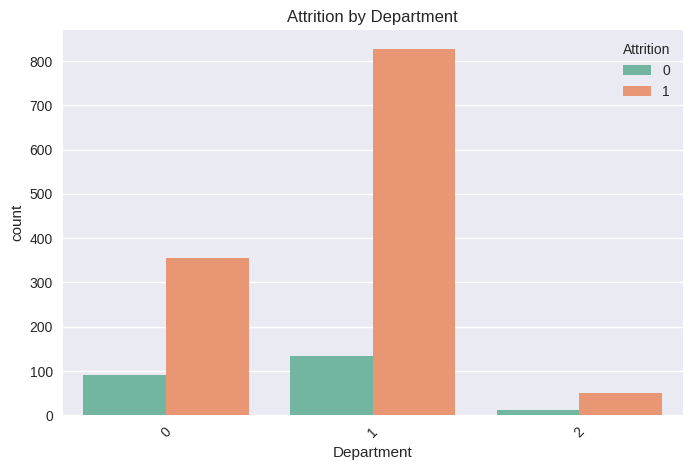

In [ ]:

plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.show()


FINAL ANALYSIS

In [ ]:

print("Average Age of employees who left:", df[df['Attrition']==mapping['Attrition']['Yes']]['Age'].mean())
print("Average YearsAtCompany of employees who left:", df[df['Attrition']==mapping['Attrition']['Yes']]['YearsAtCompany'].mean())
print("Average MonthlyIncome of employees who left:", df[df['Attrition']==mapping['Attrition']['Yes']]['MonthlyIncome'].mean())


Average Age of employees who left: 33.607594936708864
Average YearsAtCompany of employees who left: 5.1308016877637135
Average MonthlyIncome of employees who left: 4787.0928270042195
